Telecom Churn Prediction Analysis & Business Insights

Objective - To identify high-value customers at risk of churn and provide actionable insights to reduce churn rates.

Scope - Exploratory Data Analysis, Feature Engineering, Model Training, and Business Recommendations.

In [121]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', 200)

Step 1 - Understanding the Data

In [123]:
# Load the dataset
file_path = '/Users/karthikeyan/Documents/telecom_churn_data.csv'
data = pd.read_csv(file_path)

data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,...,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.3

In [124]:
data.shape

(99999, 226)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [126]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,...,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,9

Step 2 - Data Preprocessing

Columns with Missing Values:


count_rech_2g_6         74.846748
max_rech_data_6         74.846748
arpu_3g_6               74.846748
av_rech_amt_data_6      74.846748
count_rech_3g_6         74.846748
                          ...    
last_date_of_month_8     1.100011
std_og_t2o_mou           1.018010
loc_ic_t2o_mou           1.018010
loc_og_t2o_mou           1.018010
last_date_of_month_7     0.601006
Length: 166, dtype: float64

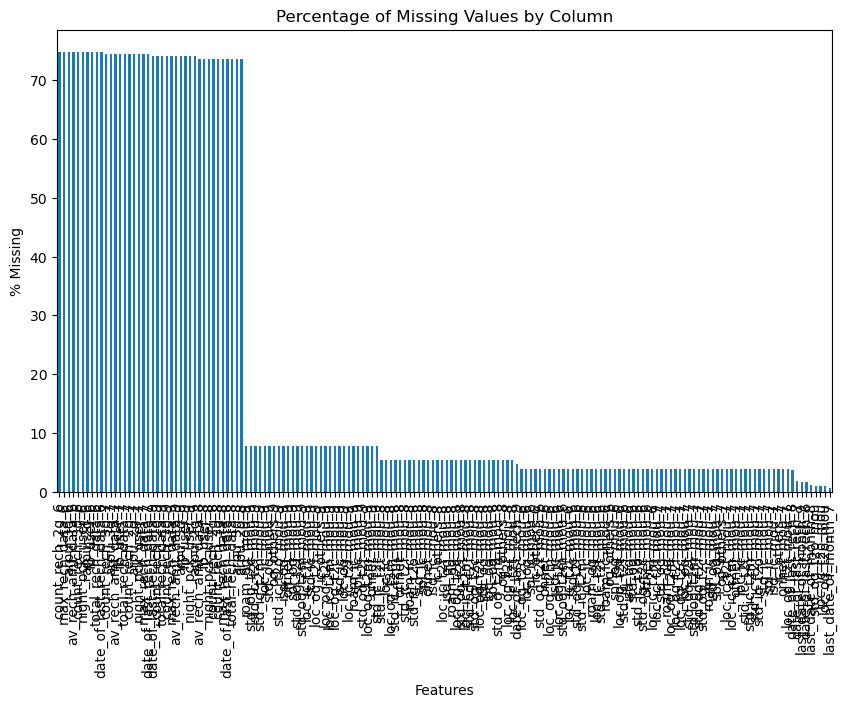

In [128]:
# Calculate percentage of missing values
missing_values = data.isnull().sum() / len(data) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Display columns with missing values
print("Columns with Missing Values:")
display(missing_values)

# Visualize missing data
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('% Missing')
plt.xlabel('Features')
plt.show()

In [129]:
# Define a threshold
threshold = 0.5

# Drop columns with missing values above threshold
missing_cols = missing_values[missing_values > threshold * 100].index
data = data.drop(columns=missing_cols)

print(f"Dropped {len(missing_cols)} columns with >50% missing values.")

Dropped 40 columns with >50% missing values.


In [130]:
data.shape

(99999, 186)

In [131]:
# Identify date columns in the dataset (e.g., columns with "date" in their names or dtype as datetime)
date_columns = data.select_dtypes(include=['datetime', 'object']).filter(like='date').columns

# Dropping 'mobile_number', 'circle_id', and all identified date columns
columns_to_drop = ['mobile_number', 'circle_id'] + list(date_columns)
data = data.drop(columns=columns_to_drop, errors='ignore')

# Verify the columns are dropped
print("Columns after dropping:")
print(data.columns)

Columns after dropping:
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=176)


In [132]:
data.shape

(99999, 176)

In [133]:
# Identify numeric and categorical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Impute numeric columns with median
num_imputer = SimpleImputer(strategy='median')
data[numeric_cols] = num_imputer.fit_transform(data[numeric_cols])

# Impute categorical columns with mode
if not categorical_cols.empty:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

print("Imputed missing values for numeric and categorical columns.")

Imputed missing values for numeric and categorical columns.


In [134]:
#Identifying high value customers

recharge_columns = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']

# Calculate average recharge amount using available columns
data['avg_recharge_amt'] = data[recharge_columns].mean(axis=1)

# Determine high-value customer threshold
hv_threshold = data['avg_recharge_amt'].quantile(0.70)
print(f"High-Value Customer Threshold (70th Percentile): {hv_threshold}")

# Retain only high-value customers
high_value_customers = data[data['avg_recharge_amt'] >= hv_threshold].copy()
print(f"Number of High-Value Customers: {high_value_customers.shape[0]}")

High-Value Customer Threshold (70th Percentile): 364.3333333333333
Number of High-Value Customers: 30024


In [135]:
high_value_customers.shape

(30024, 177)

In [136]:
high_value_customers.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt
3,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,0.00,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,14.89,289.58,226.21,2.99,1.73,6.53,9.99,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,29.23,16.63,296.11,236.21,0.0,0.00,0.00,0.0,10.96,0.00,18.09,43.29,0.0,0.0,0.0,0.0,223.23,135.31,352.21,362.54,62.08,19.98,8.04,41.73,113.96,64.51,20.28,52.86,57.43,27.09,19.84,65.59,233.48,111.59,48.18,160.19,43.48,66.44,0.00,129.84,1.33,38.56,4.94,13.98,1.18,0.00,0.00,0.0,0.0,0.0,0.0,0.0,45.99,105.01,4.94,143.83,280.08,216.61,53.13,305.38,0.59,0.0,0.00,0.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.80,10.0,11.0,18.0,14.0,230.0,310.0,601.0,410.0,60.0,50.0,50.0,50.0,30.0,50.0,50.0,30.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2491.0,0.00,0.00,0.00,0.0,380.333333
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.16,325.91,87.29,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.0,0.00,0.00,0.00,422.16,533.91,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.76,49.14,2.50,6.66,20.08,16.68,0.0,0.0,0.0,0.0,0.0,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.0,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31

Step 3 - Tag Churners

In [138]:
# Churn conditions: no calls and no data usage in churn phase (month 9)
high_value_customers['churn'] = (
    (high_value_customers.get('total_ic_mou_9', 0) == 0) &
    (high_value_customers.get('total_og_mou_9', 0) == 0) &
    (high_value_customers.get('vol_2g_mb_9', 0) == 0) &
    (high_value_customers.get('vol_3g_mb_9', 0) == 0)
).astype(int)
high_value_customers.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt,churn
3,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,0.00,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,14.89,289.58,226.21,2.99,1.73,6.53,9.99,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,29.23,16.63,296.11,236.21,0.0,0.00,0.00,0.0,10.96,0.00,18.09,43.29,0.0,0.0,0.0,0.0,223.23,135.31,352.21,362.54,62.08,19.98,8.04,41.73,113.96,64.51,20.28,52.86,57.43,27.09,19.84,65.59,233.48,111.59,48.18,160.19,43.48,66.44,0.00,129.84,1.33,38.56,4.94,13.98,1.18,0.00,0.00,0.0,0.0,0.0,0.0,0.0,45.99,105.01,4.94,143.83,280.08,216.61,53.13,305.38,0.59,0.0,0.00,0.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.80,10.0,11.0,18.0,14.0,230.0,310.0,601.0,410.0,60.0,50.0,50.0,50.0,30.0,50.0,50.0,30.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2491.0,0.00,0.00,0.00,0.0,380.333333,0
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.16,325.91,87.29,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.0,0.00,0.00,0.00,422.16,533.91,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.76,49.14,2.50,6.66,20.08,16.68,0.0,0.0,0.0,0.0,0.0,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.0,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.

In [139]:
# Remove attributes of the churn phase
# Drop all columns containing '_9'
columns_to_drop = [col for col in high_value_customers.columns if '_9' in col]
data_final = high_value_customers.drop(columns=columns_to_drop)

# Final dataset shape and churn counts
print(f"Dataset Shape After Processing: {data_final.shape}")
print(f"Churn Counts:\n{data_final['churn'].value_counts()}")

Dataset Shape After Processing: (30024, 136)
Churn Counts:
churn
0    28172
1     1852
Name: count, dtype: int64


In [140]:
# Separate churners and non-churners
churners = data_final[data_final['churn'] == 1]
non_churners = data_final[data_final['churn'] == 0]

# Compute averages for numeric columns only (excluding non-relevant ones like mobile_number)
relevant_columns = data_final.select_dtypes(include=[np.number]).columns

print("\nAverage values for churners:")
print(churners[relevant_columns].mean())

print("\nAverage values for non-churners:")
print(non_churners[relevant_columns].mean())


Average values for churners:
loc_og_t2o_mou        0.000000
std_og_t2o_mou        0.000000
loc_ic_t2o_mou        0.000000
arpu_6              744.911770
arpu_7              657.193934
                       ...    
jul_vbc_3g           87.598742
jun_vbc_3g           88.647403
sep_vbc_3g            0.931782
avg_recharge_amt    682.223362
churn                 1.000000
Length: 136, dtype: float64

Average values for non-churners:
loc_og_t2o_mou        0.000000
std_og_t2o_mou        0.000000
loc_ic_t2o_mou        0.000000
arpu_6              556.508266
arpu_7              584.888339
                       ...    
jul_vbc_3g          139.271079
jun_vbc_3g          122.291683
sep_vbc_3g            7.454808
avg_recharge_amt    681.646931
churn                 0.000000
Length: 136, dtype: float64


In [141]:
# Compute churn rate as a percentage of high-value customers
churn_rate = (len(churners) / len(data_final)) * 100
print(f"\nChurn Rate: {churn_rate:.2f}%")


Churn Rate: 6.17%


In [142]:
selected_columns = ['total_rech_num_7', 'total_rech_num_8', 'total_ic_mou_8', 'isd_ic_mou_8']

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.10)
        Q3 = df[col].quantile(0.90)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

data_final = remove_outliers_iqr(data_final, selected_columns)
print(f"Data shape after selective outlier removal: {data_final.shape}")

Data shape after selective outlier removal: (27631, 136)


Feature Engineering: Create New Features

In [144]:
# Recharge Behavior
#recharge_frequency_ratio: Ratio of total recharge numbers between the 7th and 8th month
data_final['recharge_frequency_ratio'] = data_final['total_rech_num_8'] / (data_final['total_rech_num_7'] + 1)

#recharge_amount_diff: Difference in recharge amount between 7th and 8th month.
data_final['recharge_amount_diff'] = data_final['total_rech_amt_8'] - data_final['total_rech_amt_7']

In [145]:
#Customer Behavior Change Features
#recharge_trend: Binary flag to indicate decreasing recharge trend
data_final['recharge_trend'] = np.where(data_final['total_rech_amt_8'] < data_final['total_rech_amt_7'], 1, 0)

In [146]:
#Usage Behavior Features
#voice_call_drop_ratio: Ratio of total outgoing calls to total incoming calls for the 8th month.
data_final['voice_call_drop_ratio'] = data_final['total_og_mou_8'] / (data_final['total_ic_mou_8'] + 1)

#total_call_volume: Sum of total outgoing and incoming calls in the 8th month.
data_final['total_call_volume'] = data_final['total_og_mou_8'] + data_final['total_ic_mou_8']

In [147]:
#Aggregated Features
#avg_monthly_recharge_amt: Average recharge amount across 7th and 8th months
data_final['avg_monthly_recharge_amt'] = (data_final['total_rech_amt_7'] + data_final['total_rech_amt_8']) / 2

#total_calls_ratio: Ratio of total calls (incoming + outgoing) to recharge amount
data_final['total_calls_ratio'] = data_final['total_call_volume'] / (data_final['total_rech_amt_8'] + 1)

In [148]:
print("Newly Created Features:")
print(data_final[['recharge_frequency_ratio', 'recharge_amount_diff', 'recharge_trend', 'voice_call_drop_ratio', 'total_call_volume', 'avg_monthly_recharge_amt','total_calls_ratio']].head())

Newly Created Features:
    recharge_frequency_ratio  recharge_amount_diff  recharge_trend  \
3                   1.500000                 291.0               0   
7                   1.166667                2848.0               0   
8                   0.636364                -481.0               1   
15                  0.785714                  10.0               0   
20                  1.000000                 227.0               0   

    voice_call_drop_ratio  total_call_volume  avg_monthly_recharge_amt  \
3                6.506743             405.34                     455.5   
7                0.814818             778.90                    2214.0   
8                9.781072             188.10                     360.5   
15              14.245728            1381.94                     691.0   
20               1.112513             385.78                     363.5   

    total_calls_ratio  
3            0.673322  
7            0.214042  
8            1.554545  
15           1






EDA Analysis

In [150]:
summary_stats = data_final.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         27631.0         27631.0         27631.0  27631.000000   
mean              0.0             0.0             0.0    559.722653   
std               0.0             0.0             0.0    400.886942   
min               0.0             0.0             0.0  -2258.709000   
25%               0.0             0.0             0.0    340.177500   
50%               0.0             0.0             0.0    477.559000   
75%               0.0             0.0             0.0    688.166500   
max               0.0             0.0             0.0  15487.684000   

             arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count  27631.000000  27631.000000  27631.000000  27631.000000  27631.000000   
mean     575.727197    561.527384    287.212218    306.264411    290.346643   
std      378.186668    408.447539    455.727186    474.128910    470.811564   
min    -2014.045000   -

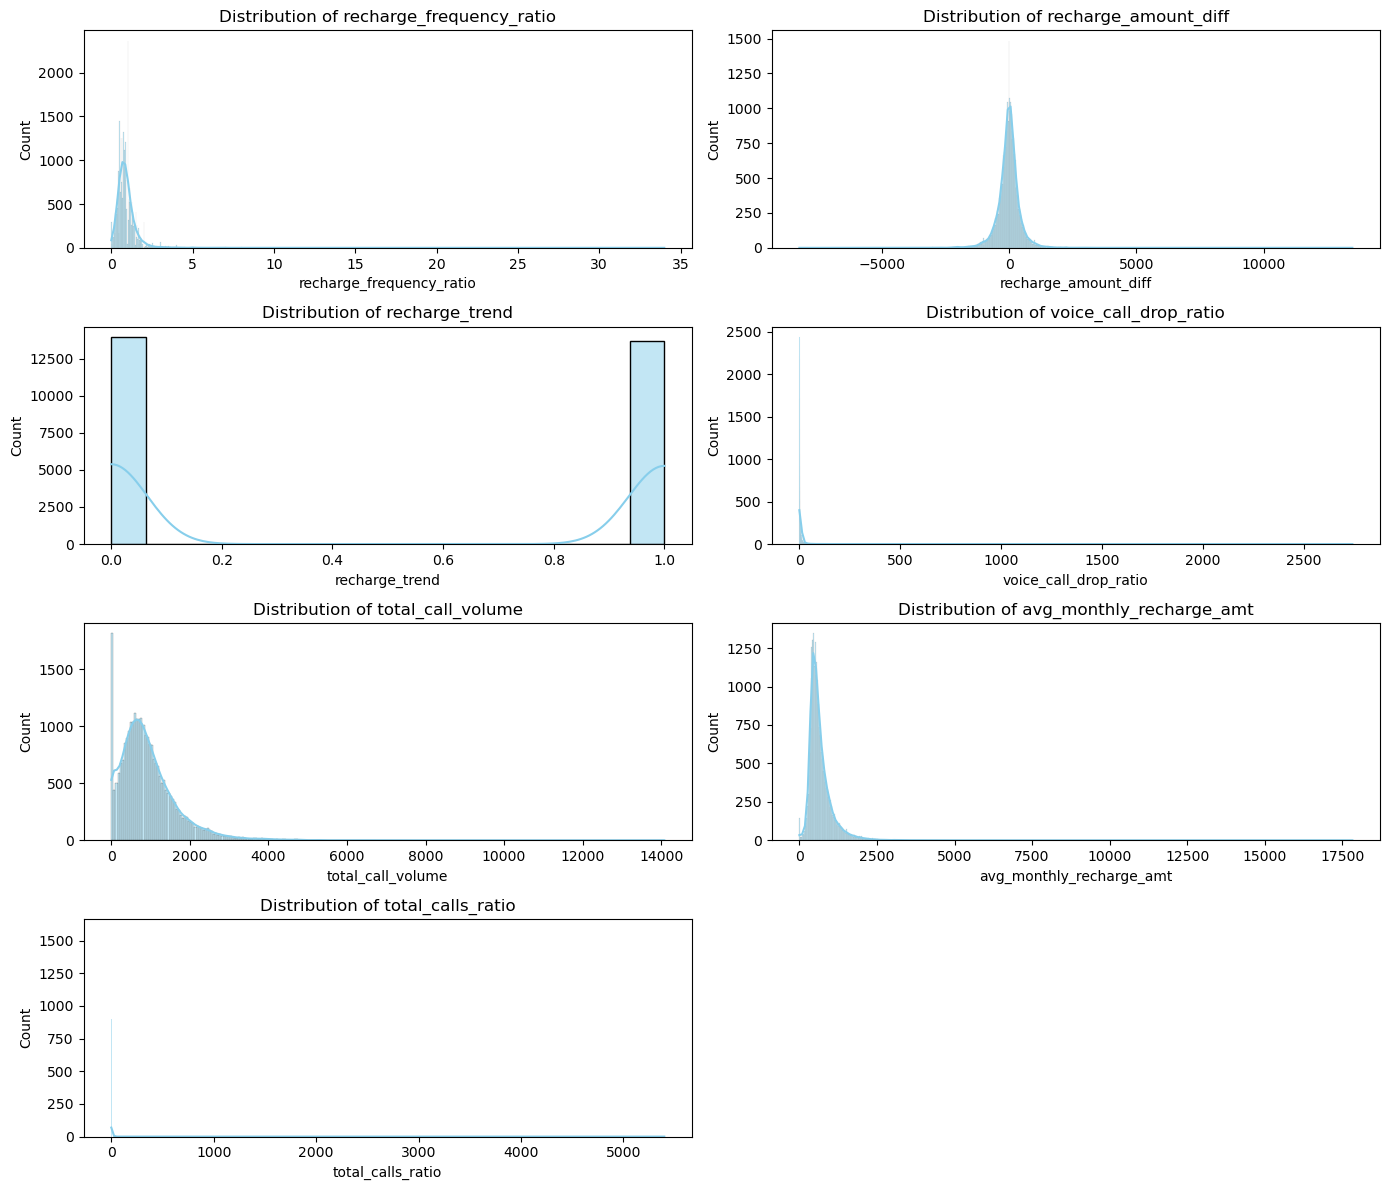

In [151]:
# List of new features
new_features = ['recharge_frequency_ratio', 'recharge_amount_diff', 'recharge_trend',
                'voice_call_drop_ratio', 'total_call_volume', 'avg_monthly_recharge_amt',
                'total_calls_ratio']

# Plot univariate distribution
plt.figure(figsize=(14, 12))
for i, feature in enumerate(new_features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data_final[feature].dropna(), kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Mean values of new features for churn and non-churn groups:

                          Non-Churners    Churners
recharge_frequency_ratio      0.938399    0.602562
recharge_amount_diff          6.182486 -377.106455
recharge_trend                0.476358    0.763873
voice_call_drop_ratio         7.432893    5.178325
total_call_volume           978.104789  389.151104
avg_monthly_recharge_amt    675.595245  548.871461
total_calls_ratio             7.673829    6.256090


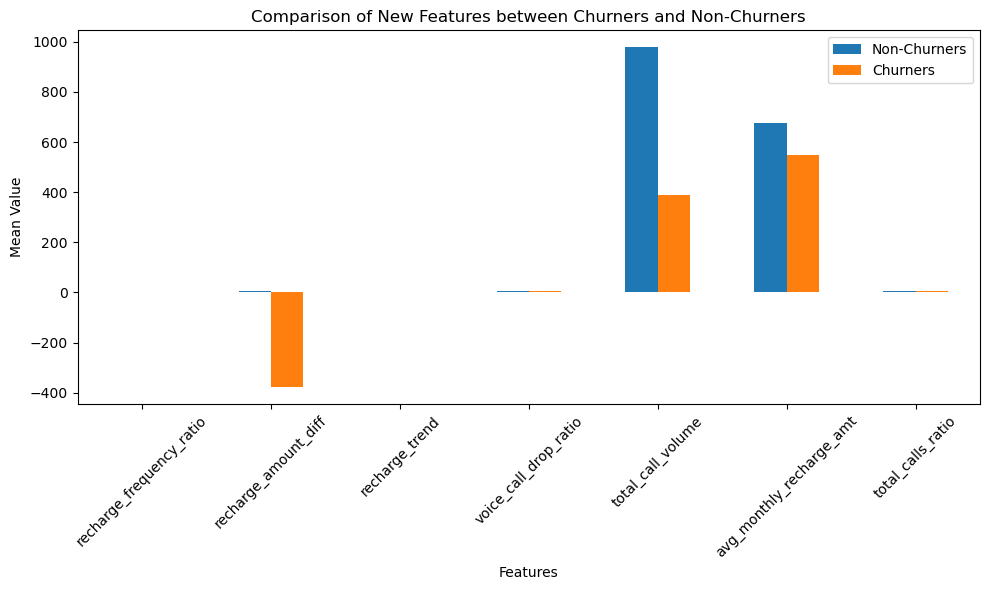

In [152]:
# Calculate mean values of features for churners and non-churners
mean_values = data_final.groupby('churn')[new_features].mean().T
mean_values.columns = ['Non-Churners', 'Churners']
print("Mean values of new features for churn and non-churn groups:\n")
print(mean_values)

# Plot bar chart for comparison
mean_values.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of New Features between Churners and Non-Churners')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [153]:
# Define features and target
X = data_final.drop(columns=['churn'])  # Exclude the churn column
y = data_final['churn']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (optional, depending on data distribution)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [155]:
# Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      5174
           1       0.24      0.77      0.37       353

    accuracy                           0.83      5527
   macro avg       0.61      0.80      0.64      5527
weighted avg       0.93      0.83      0.87      5527



In [157]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[4335  839]
 [  82  271]]



ROC-AUC Score: 0.88


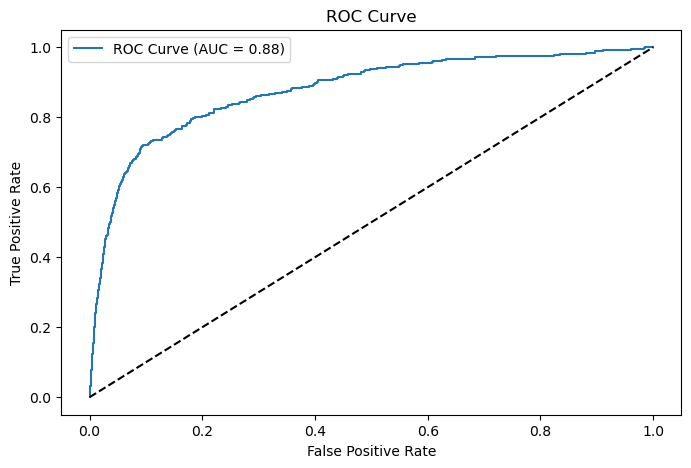

In [159]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nROC-AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

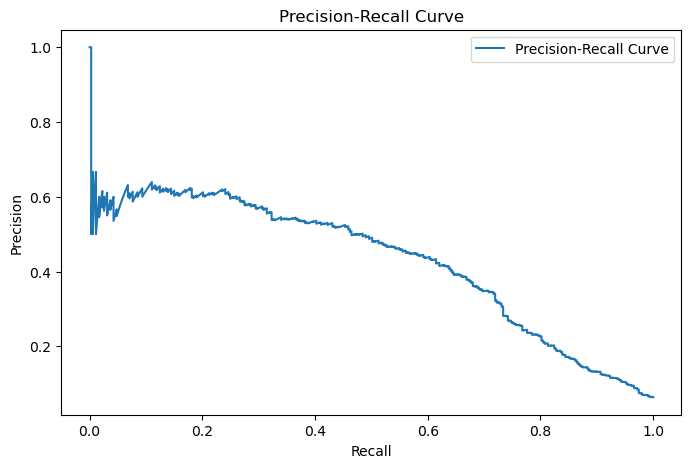

In [161]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

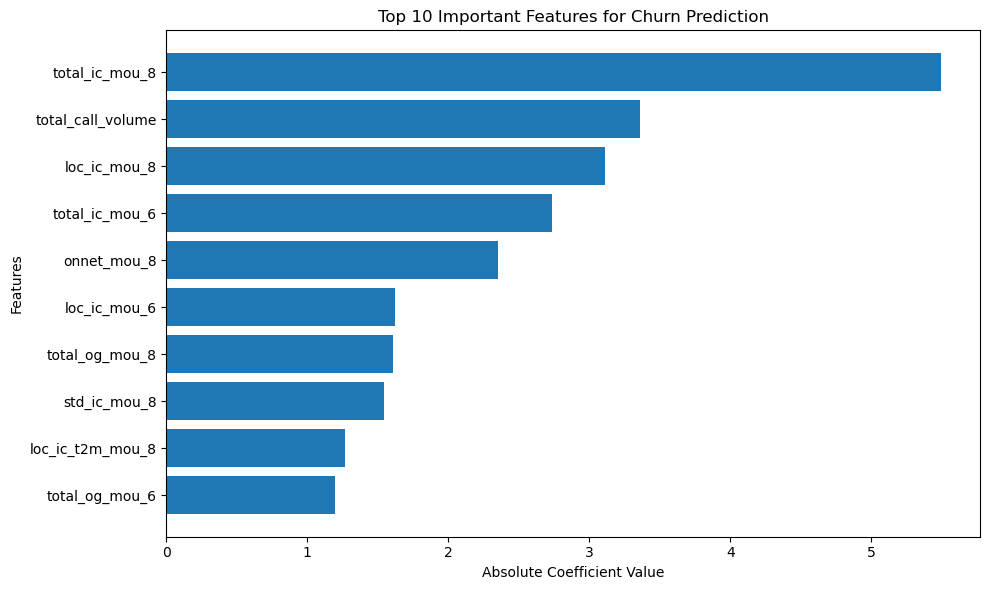

In [163]:
# Feature Importance
coefficients = model.coef_[0]
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10][::-1], feature_importance['Abs_Coefficient'][:10][::-1])
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.title('Top 10 Important Features for Churn Prediction')
plt.tight_layout()
plt.show()

In [165]:
# Predictions on Train Set
y_train_pred = model.predict(X_train)
y_train_pred_prob = model.predict_proba(X_train)[:, 1]

# Predictions on Test Set
y_test_pred = model.predict(X_test)
y_test_pred_prob = model.predict_proba(X_test)[:, 1]

In [167]:
# Train Set Evaluation
print("Train Set Evaluation:")
print(classification_report(y_train, y_train_pred))
train_roc_auc = roc_auc_score(y_train, y_train_pred_prob)
print(f"Train ROC-AUC Score: {train_roc_auc:.2f}")

# Test Set Evaluation
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_test_pred))
test_roc_auc = roc_auc_score(y_test, y_test_pred_prob)
print(f"Test ROC-AUC Score: {test_roc_auc:.2f}")

Train Set Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     20691
           1       0.27      0.83      0.40      1413

    accuracy                           0.84     22104
   macro avg       0.63      0.84      0.66     22104
weighted avg       0.94      0.84      0.88     22104

Train ROC-AUC Score: 0.90

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      5174
           1       0.24      0.77      0.37       353

    accuracy                           0.83      5527
   macro avg       0.61      0.80      0.64      5527
weighted avg       0.93      0.83      0.87      5527

Test ROC-AUC Score: 0.88


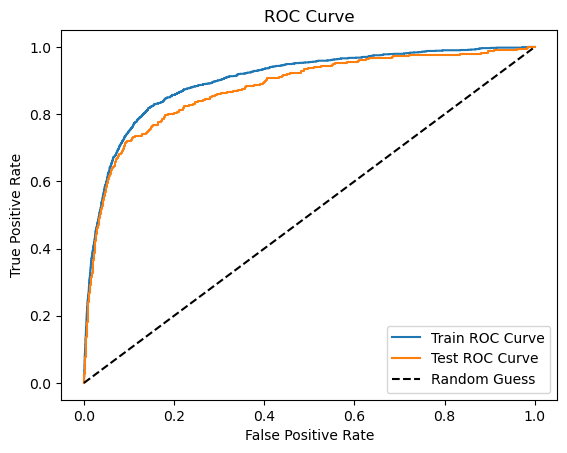

In [169]:
# Train Set ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
plt.plot(fpr_train, tpr_train, label='Train ROC Curve')

# Test Set ROC Curve
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
plt.plot(fpr_test, tpr_test, label='Test ROC Curve')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

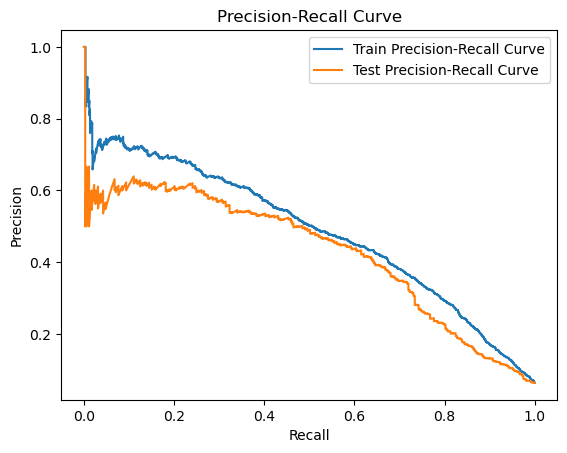

In [171]:
# Train Set Precision-Recall Curve
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_pred_prob)
plt.plot(recall_train, precision_train, label='Train Precision-Recall Curve')

# Test Set Precision-Recall Curve
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_prob)
plt.plot(recall_test, precision_test, label='Test Precision-Recall Curve')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()